In [1]:
import argparse
import gzip
import requests
import pandas as pd
import sys
import os
import csv
import glob
from collections import defaultdict
from scipy.sparse import coo_matrix
from scipy.io import mmwrite
from shapely.geometry import MultiPoint, Polygon, Point
from rtree import index
import read_roi
from tqdm import tqdm

In [4]:
df = pd.read_csv('/data/petar/fgf1/resolve/rois/32810-1377-slide3_A1-1_DAPI_dapi_ROIs.csv')
df.head()

,ROI_Name,X,Y
0,Cell1_5276_26,5278,16
1,Cell1_5276_26,5285,16
2,Cell1_5276_26,5290,20
3,Cell1_5276_26,5285,35
4,Cell1_5276_26,5275,42


In [35]:
def vertecies_to_shapely_polygon(roi_name=None, coordinates=None):
    if len(coordinates) < 3:
        print(f'Warning: Not enough coordinates for {roi_name} to form a valid polygon.')
        pg = Polygon()
    else:
        if coordinates[0] != coordinates[-1]:
            coordinates.append(coordinates[0])  # Add the first coordinate to the end if necessary
        pg = Polygon(coordinates)
    return pg

In [36]:
dfgb = df.groupby('ROI_Name')

In [78]:
polygons = []
for name, group in df.groupby('ROI_Name'):
    vertices = [(x, y) for x, y in zip(group['X'], group['Y'])]
    # Add the last vertex identical to the first to make the polygon closed
    polygons.append({'ROI_Name': name, 'polygon': vertecies_to_shapely_polygon(name, vertices)})


In [86]:
polygon_df = pd.DataFrame(polygons)
polygon_df['Area'] = polygon_df['polygon'].apply(lambda x: x.area)
polygon_df

,ROI_Name,polygon,Area
0,Cell1000_3150_6151,"POLYGON ((3135 6130, 3161 6132, 3176 6139, 318...",2135.5
1,Cell1001_9621_6163,"POLYGON ((9618 6134, 9632 6135, 9646 6148, 965...",2543.5
2,Cell1002_7821_6150,"POLYGON ((7821 6138, 7831 6142, 7835 6156, 782...",424.5
3,Cell1003_4839_6159,"POLYGON ((4836 6139, 4854 6143, 4861 6154, 484...",1418.0
4,Cell1004_7177_6151,"POLYGON ((7173 6143, 7179 6143, 7185 6148, 718...",317.5
...,...,...,...
3272,Cell997_4394_6133,"POLYGON ((4397 6116, 4412 6118, 4423 6126, 442...",1922.0
3273,Cell998_9221_6146,"POLYGON ((9212 6122, 9223 6122, 9232 6126, 924...",1994.5
3274,Cell999_10711_6137,"POLYGON ((10713 6124, 10717 6125, 10718 6129, ...",513.0
3275,Cell99_10259_1015,"POLYGON ((10259 996, 10269 997, 10277 1008, 10...",1122.5


In [85]:
set([type(x) for x in polygon_df['polygon']])

{shapely.geometry.polygon.Polygon}

In [ ]:
[x for x in ]

In [68]:
points = group[['X', 'Y']].values
points

array([[10647,   107],
       [10662,   109],
       [10670,   115],
       [10675,   126],
       [10671,   141],
       [10663,   147],
       [10655,   148],
       [10642,   139],
       [10638,   124],
       [10646,   108]])

In [69]:
convex_hull = MultiPoint(points)

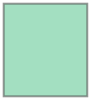

In [77]:
convex_hull.

In [ ]:
for name, group in df.groupby('ROI_Name'):
    df.assign(new_col=some_func(df['some_col']))

In [39]:
a = Polygon()

In [44]:
a.area

0.0

In [47]:
def read_roi_zip(zip_file_path):
    rois = read_roi.read_roi_zip(zip_file_path)
    rois_converted = []
    for roi_name, roi in rois.items():
        if roi['type'] == 'rectangle':
            x, y, w, h = roi['left'], roi['top'], roi['width'], roi['height']
            rois_converted.append({'ROI_Name': roi_name, 'X': x, 'Y': y})
        elif roi['type'] == 'freehand':
            x, y = roi['x'], roi['y']
            for i in range(len(x)):
                rois_converted.append({'ROI_Name': roi_name, 'X': x[i], 'Y': y[i]})
        else:
            raise ValueError(f'Unsupported ROI type: {roi["type"]}')
    rois_df = pd.DataFrame(rois_converted)
    return rois_df

In [48]:
rois_df = read_roi_zip('/data/petar/fgf1/resolve/rois/32810-1377-slide3_C2-1_DAPI_dapi_ROIs.zip')

In [50]:
rois = read_roi.read_roi_zip('/data/petar/fgf1/resolve/rois/32810-1377-slide3_C2-1_DAPI_dapi_ROIs.zip')

In [59]:
for roi_name, roi in rois.items():
    if len(roi['x']) < 3:
        print(roi)

{'type': 'freehand', 'x': [4619, 4619], 'y': [8747, 8748], 'n': 2, 'width': 0, 'name': 'Cell1828_4619_8748', 'position': 0}
{'type': 'freehand', 'x': [4619, 4619], 'y': [8749, 8750], 'n': 2, 'width': 0, 'name': 'Cell1830_4619_8750', 'position': 0}


In [55]:
rois['Cell1000_4928_5240']

{'type': 'freehand',
 'x': [4917,
  4936,
  4947,
  4948,
  4943,
  4948,
  4948,
  4938,
  4931,
  4924,
  4919,
  4919,
  4907,
  4903,
  4909,
  4916],
 'y': [5204,
  5206,
  5218,
  5235,
  5236,
  5237,
  5243,
  5278,
  5284,
  5284,
  5277,
  5267,
  5247,
  5215,
  5207,
  5205],
 'n': 16,
 'width': 0,
 'name': 'Cell1000_4928_5240',
 'position': 0}